# Проект «Принятие решений в бизнесе»

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#ICE" data-toc-modified-id="ICE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ICE</a></span></li><li><span><a href="#RICE" data-toc-modified-id="RICE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RICE</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Подготовка-таблиц-с-кумулятивными-данными" data-toc-modified-id="Подготовка-таблиц-с-кумулятивными-данными-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка таблиц с кумулятивными данными</a></span></li><li><span><a href="#Построение-графиков-с-кумулятивными-данными-по-группам" data-toc-modified-id="Построение-графиков-с-кумулятивными-данными-по-группам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построение графиков с кумулятивными данными по группам</a></span></li><li><span><a href="#Построение-точечных-графиков-для-определения-аномалий" data-toc-modified-id="Построение-точечных-графиков-для-определения-аномалий-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Построение точечных графиков для определения аномалий</a></span></li><li><span><a href="#Анализ-статистической-значимости" data-toc-modified-id="Анализ-статистической-значимости-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ статистической значимости</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Описание проекта

<div class="alert alert-info">
<font size="3", color = "black"><b> Цель:  </b>  <br /> Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами
<br /> <br />
<b>План действий:</b>
    
1. Импортировать библиотеки, загрузить данные и изучить информацию по каждому из них. Подготовить данные к анализу.<br />
<br />
2. Провести приоритизацию гипотез, произвести расчет ICE и RICE. <br />
<br />
3. Провести анализ А/В-теста:
    - Подготовить таблицы с кумулятивными данными;
    - Построить графики с кумулятивными данными по группам;
    - Построить точечные графики для определения аномальных значений;
    - Проанализировать статистическую значимость. <br />
<br />
4. Сделать заключительный вывод по всей проделанной работе.
    </font>

## Подготовка данных к анализу

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta
import math

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [4]:
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


In [6]:
hypothesis.duplicated().sum()

0

In [7]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#заменим тип столбца date на корректный
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders.describe()

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
#заменим тип столбца date на корректный
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
visitors.describe()

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [16]:
visitors.duplicated().sum()

0

<div class="alert alert-info">
<font size="3", color = "black">
    
   <b>Вывод: </b> анализ показал отсутствие пропусков и дубликатов в данных. Также был изменен тип данных в столбцах date двух датафреймов на корректный. В остальном данные готовы к проверке гипотез.

## Приоритизация гипотез

### ICE

In [17]:
hypothesis['ICE'] = (hypothesis['Impact'] *  hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<div class="alert alert-info">
<font size="3", color = "black">
    По ICE наиболее привлекательной получается 8 гипотеза, следом идут 0 и 7.

### RICE

In [18]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] *  hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


<div class="alert alert-info">
<font size="3", color = "black">
    По RICE наиболее привлекательной получается 7 гипотеза, следом идут 2 и 0.

<div class="alert alert-info">
<font size="3", color = "black">
    <b>Вывод: </b> 8 гипотеза опустилась с первой позиции на пятую из-за низкого показателя охвата. 7 гипотеза поднялась с третьего места на первое из-за высокого показателя охвата.

## Анализ A/B-теста

In [19]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()
visitors_AB

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

<div class="alert alert-info">
<font size="3", color = "black">
Есть пользователи, попавшие в обе группы, нужно от них избавиться.

In [20]:
print((orders.groupby('visitorId')['group'].nunique()>1).count())
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
print((orders.groupby('visitorId')['group'].nunique()>1).count())

1031
973


<div class="alert alert-info">
<font size="3", color = "black">
Избавились от пользователей, попавших в обе группы, и убедились, что количество записей действительно стало меньше.

###  Подготовка таблиц с кумулятивными данными

In [21]:
dates_groups = orders[['date','group']].drop_duplicates()

In [22]:
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                            , orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))

orders_aggregated.rename(columns={'transactionId':'orders'}, inplace=True)

orders_aggregated.head()

,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66


In [23]:
visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,revenue,orders,visitors,conversion
0,2019-08-01,A,142779,23,719,0.03
1,2019-08-01,B,59758,17,713,0.02
2,2019-08-02,A,234381,42,1338,0.03
3,2019-08-02,B,221801,40,1294,0.03
4,2019-08-03,A,346854,66,1845,0.04


### Построение графиков с кумулятивными данными по группам

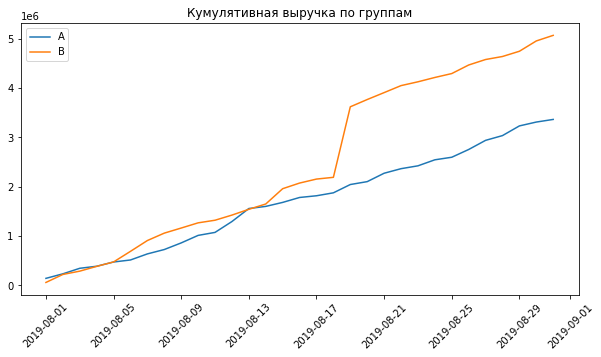

In [25]:
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders','visitors']]

plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.legend();

<div class="alert alert-info">
<font size="3", color = "black">
    <b>Вывод: </b>по данному графику заметно резкое повышение выручки после 17 августа у группы В.

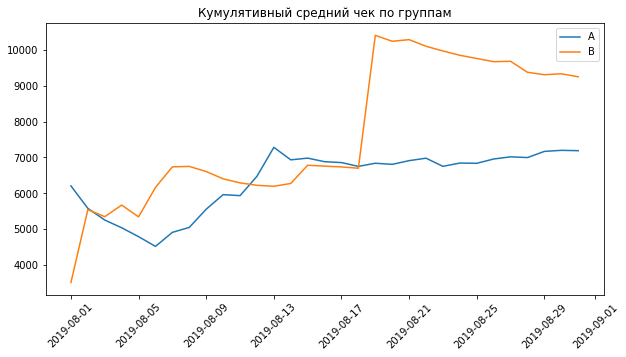

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.legend();

<div class="alert alert-info">
<font size="3", color = "black">
    <b>Вывод: </b> по данному графику также заметно резкое повышение среднего чека после 17 августа у группы В. 

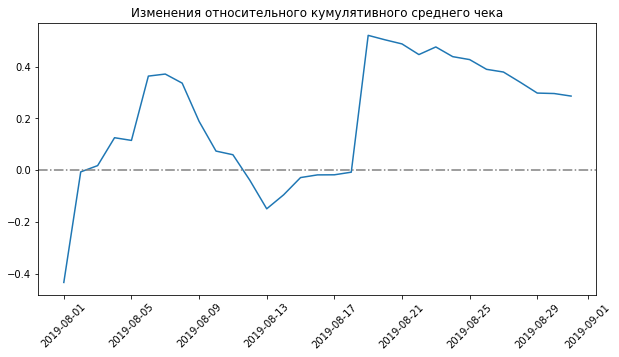

In [27]:
merged_cumulative = cumulative_a.merge(cumulative_b, on=['date'],suffixes=('_a', '_b'))

plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['revenue_b'] / merged_cumulative['orders_b']) / (merged_cumulative['revenue_a'] / merged_cumulative['orders_a']) -1
)
plt.xticks(rotation=45)
plt.title('Изменения относительного кумулятивного среднего чека')
#plt.axis(ymin=-0.5, ymax=0.6)
plt.axhline(y=0, color='grey', linestyle='-.');

<div class="alert alert-info">
<font size="3", color = "black">
    <b>Вывод: </b> и снова замечаем резкое изменение относительного кумулятивного среднего чека после 17 августа. 

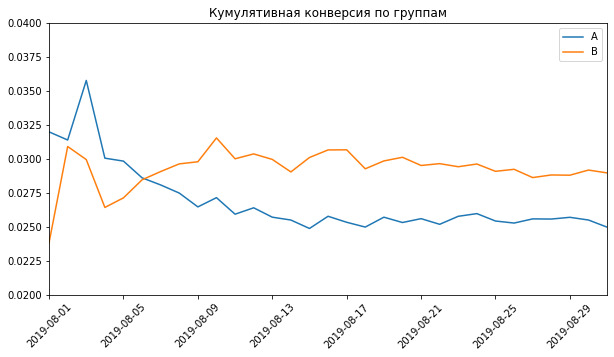

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['orders'] / cumulative_a['visitors'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['orders'] / cumulative_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия по группам')
plt.axis(xmin=cumulative_a['date'].min(), xmax=cumulative_a['date'].max(), ymin=.020, ymax=0.04)
plt.legend();

<div class="alert alert-info">
<font size="3", color = "black">
    <b>Вывод: </b> после выравнивания конверсии лидирует группа В.

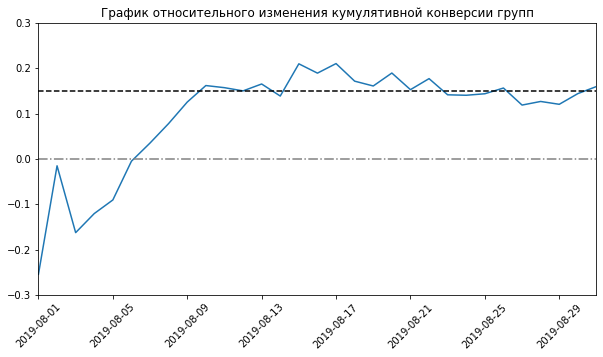

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative['date'],
    (merged_cumulative['orders_b'] / merged_cumulative['visitors_b']) / (merged_cumulative['orders_a'] / merged_cumulative['visitors_a']) -1
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.axis(xmin=merged_cumulative['date'].min(), xmax=merged_cumulative['date'].max(), ymin=-0.30, ymax=0.3)
plt.axhline(y=0, color='grey', linestyle='-.')
plt.axhline(y=0.15, color='black', linestyle='--');

<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> после небольшого спада в самом начале уверенно лидирует группа В. Всё указывает на то, что есть аномально крупные заказы в данной группе.

### Построение точечных графиков для определения аномалий

<div class="alert alert-info">
<font size="3", color = "black">Построим точечный график количества заказов по пользователям:

In [30]:
#подготовка данных
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns =  ['visitorId', 'orders']
display(orders_by_users['orders'].describe())

count   973.00
mean      1.04
std       0.24
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       3.00
Name: orders, dtype: float64

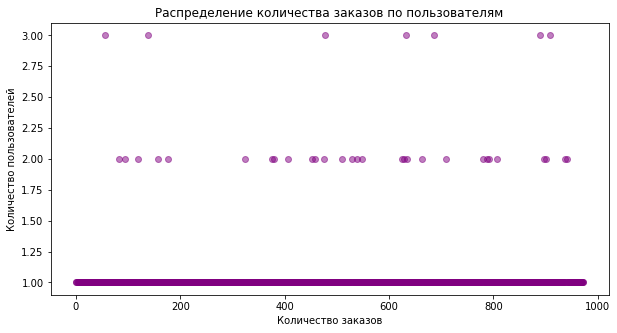

In [31]:
#построение графика
x_values = pd.Series(range(0,orders_by_users['orders'].count()))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'], color='purple', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Посмотрим 95-й и 99-й перцентили стоимости заказов:

In [32]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> не более 5% делали более 1-го заказа и не более 1% делали более 2-х заказов. Достаточно исключить данные выше 99-го перцентиля для корректного анализа.

In [33]:
per = np.percentile(orders_by_users['orders'], [99])[0]
orders_by_users_clean = orders_by_users.query('orders<= @per')

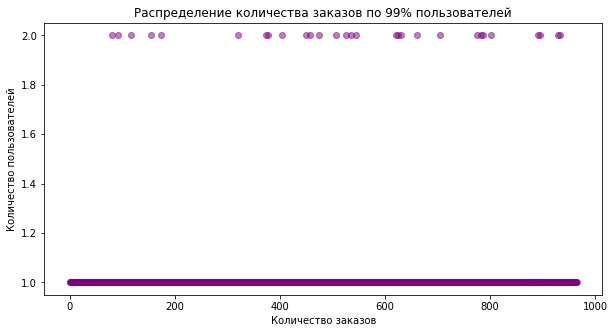

In [34]:
x_values = pd.Series(range(0,orders_by_users_clean['orders'].count()))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users_clean['orders'], color='purple', alpha=0.5)
plt.title('Распределение количества заказов по 99% пользователей')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-info">
<font size="3", color = "black">Построим точечный график стоимостей заказов:

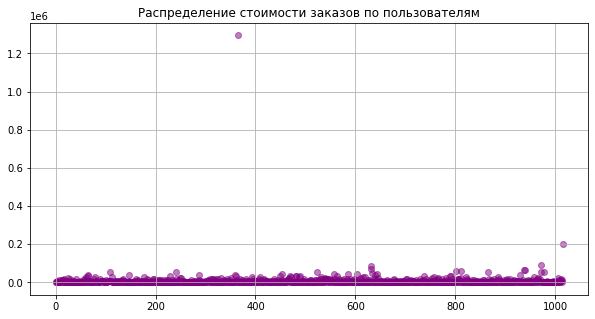

In [35]:
x_values = pd.Series(range(0,orders['revenue'].count()))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], color='purple', alpha=0.5)
plt.grid()
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Посмотрим 95-й и 99-й перцентили стоимости заказов:

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> один заказ с аномально высокой стоимостью все это время сильно влиял на показатели своей группы. Достаточно исключить данные выше 99-го перцентиля для корректного анализа.

In [37]:
per = np.percentile(orders['revenue'], [99])[0]
orders_clean = orders.query('revenue<= @per')

Теперь данные выглядят более информативно.

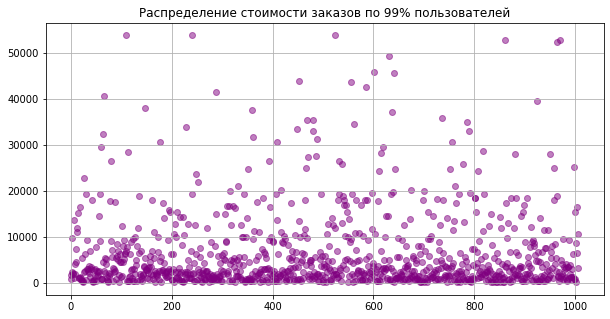

In [38]:
x_values = pd.Series(range(0,orders_clean['revenue'].count()))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_clean['revenue'], color='purple', alpha=0.5)
plt.grid()
plt.title('Распределение стоимости заказов по 99% пользователей')
plt.show()

### Анализ статистической значимости

<div class="alert alert-info">
<font size="3", color = "black">
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:

In [39]:
# подготовка данных
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

freeA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')


In [40]:
# создание выборок
sampleA = pd.concat([orders_by_usersA['orders'], freeA])
sampleB = pd.concat([orders_by_usersB['orders'], freeB])

<div class="alert alert-info">
<font size="3", color = "black">
Нулевая гипотеза: конверсии двух групп между собой не имеют статистически значимую разницу <br/>
Альтернативная гипотеза: конверсии двух групп между собой имеют статистически значимую разницу <br/>
Примем уровень значимости alpha = .05 <br/>
Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни
    <font size="3", color = "black">

In [41]:
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))


p-значение: 0.0055090420550073455
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> различие в 0.4% оказалось статистически значимым для отвержения нулевой гипотезы. 

 <div class="alert alert-info">
<font size="3", color = "black">
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

<div class="alert alert-info">
<font size="3", color = "black">
Нулевая гипотеза: средний чек заказа двух групп между собой не имеют статистически значимую разницу <br/>
Альтернативная гипотеза: средний чек заказа двух групп между собой имеют статистически значимую разницу <br/>
Примем уровень значимости alpha = .05 <br/>
    <font size="3", color = "black">

In [42]:
alpha = .05

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))


p-значение: 0.41474544990747664
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95


<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> различие в почти 2000 у.е. не является статистически значимым, потому не отвергаем нулевую гипотезу.

 <div class="alert alert-info">
<font size="3", color = "black">
    Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:

In [43]:
#подготовка данных
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

freeA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')


In [44]:
#создание выборок
sampleA = pd.concat([orders_by_usersA['orders'], freeA])
sampleB = pd.concat([orders_by_usersB['orders'], freeB])

<div class="alert alert-info">
<font size="3", color = "black">
Нулевая гипотеза: конверсии двух групп между собой не имеют статистически значимую разницу <br/>
Альтернативная гипотеза: конверсии двух групп между собой имеют статистически значимую разницу <br/>
Примем уровень значимости alpha = .05 <br/>

In [45]:
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p-значение: 0.004831636256967929
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> данные не изменились, различие в 0.4% оказалось статистически значимым для отвержения нулевой гипотезы.

<div class="alert alert-info">
<font size="3", color = "black">
    Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

<div class="alert alert-info">
<font size="3", color = "black">
Нулевая гипотеза: средний чек заказа двух групп между собой не имеют статистически значимую разницу<br/>
Альтернативная гипотеза: средний чек заказа двух групп между собой имеют статистически значимую разницу <br/>
Примем уровень значимости alpha = .05 <br/>
    <font size="3", color = "black">

In [46]:
alpha = .05

results = st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])


print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Средний чек группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))

p-значение: 0.4503442178280369
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 6504.55
Средний чек группы B: 6298.83


<div class="alert alert-info">
<font size="3", color = "black"><b>Вывод: </b> различие в среднем чеке уменьшилось до 200 у.е. и уже не так смущает. Различие по-прежнему не является статистически значимым, потому не отвергаем нулевую гипотезу.

<div class="alert alert-info">
<font size="3", color = "black">
<b>На основе анализа данных принимаем решение: </b> <br/>
Остановить тест, зафиксировать победу одной из групп. Несмотря на небольшое отличие в среднем чеке, разница в средней конверсии делает группу В победителем в данном тесте.

## Итоговый вывод

<div class="alert alert-info">
<font size="3", color = "black">
    
<b> ✍Были выполнены следующие шаги:</b> <br/>
<br/>
    Шаг 1. Импортированы данные, загружены 3 датафрейма  и изучена информация по каждому из них: пропущенных значений нет, в orders и visitors имеется некорректный тип данных для столбца date.<br/>
    <br/>
    Шаг 2. Произведена приоритизация гипотез, произведены расчеты ICE и RICE.<br/>
    <br/>
    Шаг 3. Проведен анализ А/В-теста:
- Подготовлены таблицы с кумулятивными данными;
- Построены графики с кумулятивными данными по группам;
- Построены точечные графики для определения аномальных значений;
- Проанализирована статистическая значимость.
<br /> 

<b> При работе с данным проектом я научился и повторил каким образом: <br /> </b>
    
+ Читать тех. задание проекта
+ Строить информативные визуализации
+ Формировать выводы
+ Заниматься предобработкой данных
+ Объединять столбцы и датафреймы
+ Создавать датафреймы
+ Формулировать нулевые и альтернативные гипотезы
+ Проверять нулевые и альтернативные гипотезы
+ Подбирать метод тестирования для каждой гипотезы
    
В ходе выполнения проекта были закреплены знания о методах проверки гипотез и анализа А/В теста. После анализа А/В теста было принято решение остановить тест, зафиксировать победу одной из групп. Несмотря на небольшое отличие в среднем чеке, разница в средней конверсии делает группу В победителем в данном тесте. <br /> 
    <br /> 
После изучения данных выяснили 3 наиболее приоритетные гипотезы: <br /> 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок <br /> 
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа <br /> 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей <br /> 
    <br /> 